In [1]:
#importing the required packages
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
# reading the required dataset
data = pd.read_csv("punprecip.csv")
print(data.shape) 
data.head()
print(data.dtypes)

(10553, 10)
Date                  object
Longitude            float64
Latitude             float64
Elevation              int64
Max Temperature      float64
Min Temperature      float64
Precipitation        float64
Wind                 float64
Relative Humidity    float64
Solar                float64
dtype: object


In [8]:
#selecting the required columns
df=data[['Date','Precipitation']]
df.head()


,Date,Precipitation
0,1/1/1985,4.277804
1,1/2/1985,1.891709
2,1/3/1985,0.000000
3,1/4/1985,6.416703
4,1/5/1985,25.347509


In [9]:
# convert into datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

C:\Users\shwet\Documents\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Date             datetime64[ns]
Precipitation           float64
dtype: object

In [10]:
# indexing the Date column
df.head()
df.dtypes
df.set_index('Date', inplace=True)
df.head()

,Precipitation
Date,
1985-01-01,4.277804
1985-01-02,1.891709
1985-01-03,0.000000
1985-01-04,6.416703
1985-01-05,25.347509


In [11]:
# Defining the parameters p,d,q and mentioning the range  
p = d = q = range(0, 2)

# generating p,d,q
pdq = list(itertools.product(p, d, q))

# generating seasonal p, q and q triplets combination
seasonal_pdq = [(x[0], x[1], x[2], 30) for x in list(itertools.product(p, d, q))]

print('Seasonal ARIMA examples for combination...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Seasonal ARIMA examples for combination...
SARIMAX: (0, 0, 1) x (0, 0, 1, 30)
SARIMAX: (0, 0, 1) x (0, 1, 0, 30)
SARIMAX: (0, 1, 0) x (0, 1, 1, 30)
SARIMAX: (0, 1, 0) x (1, 0, 0, 30)


In [12]:
warnings.filterwarnings("ignore") # ignoring the warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 30) - AIC:86469.34460138164
ARIMA(0, 0, 0)x(0, 0, 1, 30) - AIC:85844.03076920754
ARIMA(0, 0, 0)x(0, 1, 0, 30) - AIC:91073.14683298187
ARIMA(0, 0, 0)x(0, 1, 1, 30) - AIC:85118.51572377102
ARIMA(0, 0, 0)x(1, 0, 0, 30) - AIC:85784.12947804248
ARIMA(0, 0, 0)x(1, 0, 1, 30) - AIC:85736.87082296445
ARIMA(0, 0, 0)x(1, 1, 0, 30) - AIC:88661.95554551193
ARIMA(0, 0, 1)x(0, 0, 0, 30) - AIC:83755.5771843894
ARIMA(0, 0, 1)x(0, 0, 1, 30) - AIC:83371.242529763
ARIMA(0, 0, 1)x(0, 1, 0, 30) - AIC:89273.28748537286
ARIMA(0, 0, 1)x(0, 1, 1, 30) - AIC:82806.90587828384
ARIMA(0, 0, 1)x(1, 0, 0, 30) - AIC:83365.10031026442
ARIMA(0, 0, 1)x(1, 0, 1, 30) - AIC:83326.24958856091
ARIMA(0, 0, 1)x(1, 1, 0, 30) - AIC:86578.53234651295
ARIMA(0, 0, 1)x(1, 1, 1, 30) - AIC:82758.8014226271
ARIMA(0, 1, 0)x(0, 0, 0, 30) - AIC:85045.5883086371
ARIMA(0, 1, 0)x(0, 0, 1, 30) - AIC:84823.73971365843
ARIMA(0, 1, 0)x(0, 1, 0, 30) - AIC:92116.85636993076
ARIMA(0, 1, 0)x(0, 1, 1, 30) - AIC:84742.6938942715

In [13]:
#fitting the model
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 30),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3133      0.004     74.447      0.000       0.305       0.322
ma.L1         -0.9111      0.003   -359.292      0.000      -0.916      -0.906
ma.S.L30      -1.0000      1.702     -0.587      0.557      -4.336       2.336
sigma2       133.0820    226.643      0.587      0.557    -311.130     577.294


In [15]:
#storing the result on pred
pred = results.get_prediction(start=7631, dynamic=False)
pred_ci = pred.conf_int()

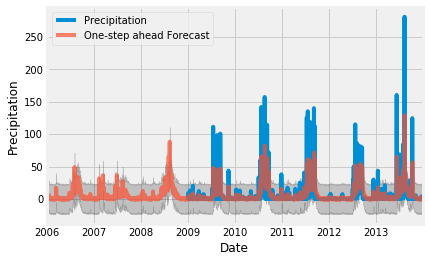

In [16]:
#plotting the forecast
ax = df.loc['2009':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Precipitation')
plt.legend()

plt.show()

In [17]:
# specifying the actual data range
data_forecasted = pred.predicted_mean
data_actual = df['2006-01-01':]

In [18]:
len(data_forecasted)

2922

In [19]:
len(data_actual)


2922

In [20]:
#creating the list forecast which will append the value
forecast=[]
for i in data_forecasted:
    forecast.append(i)
forecast=[round(i,2) for i in forecast]
forecast
len(forecast)

2922

In [21]:
#creating the list actual which will append the value
actual=[]
for x in data_actual['Precipitation']:
    actual.append(x)
actual
len(actual)

2922

In [22]:
#calculating the rms
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(actual, forecast))
rms

13.301572638275248